### Thailand Telecommunication: Stock Price Analysis of 3 major companies

Thailand boasts a thriving telecommunications industry with a range of companies offering services to the public. Among these, AIS, DTAC, and True Corporation are the three main telecommunication companies in the country.

The purpose of this project is to analyze the performance of these companies and provide valuable insights by exploring datasets of their stock prices and trade volumes. Through this analysis, we aim to gain a comprehensive understanding of each company's market position

it is essential to clarify that the analysis presented in this project is solely for the purpose of demonstrating skills in data exploration and visualization. It is not intended to provide investment advice, and the results should not be taken as a recommendation for or against any investment decisions.

Also, note that making informed investment decisions requires a comprehensive understanding of market conditions, financial statements, and other factors that may affect the performance of a company. Therefore, it is always advisable to consult with a professional financial advisor before making any investment decisions.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm


**Datesets:** AIS, DTAC, and TRUE historical stock datesets between 2017 and 2022 

**Source:** Investing.com (initially intended to use an investPY to pull the dataset but unfortunately the there was an error so we import it in csv file)

In [32]:
#Data importing
ais = pd.read_csv('ais.csv')
dtac  = pd.read_csv('dtac.csv')
true  = pd.read_csv('true.csv')

stocklist = (ais,dtac,true)
stockname = ('ais','dtac','true')

Upon a preliminary examination of the dataset, it has come to our attention that the trading volumes are expressed in millions, as indicated by the display unit "M" (e.g., "6.35M"). While it might be possible to simply remove the display unit by replacing it with blank space, we have discovered that some of the values are expressed in thousands ("K") or billions ("B"), making it more challenging to clean the dataset using simple replace functions.

To address this issue, we will be using the pandas library and a for loop function to individually examine and adjust each value's display unit as necessary. In this case, we will be converting all values to millions for consistency.

Please see below for the adjustment codes:

In [33]:
#Data Cleaning and Transforming
for index, i in enumerate(stocklist):
    
    i['Date'] = pd.to_datetime(i['Date'], dayfirst=False)
    
    
    for n in range(0,i.shape[0]):
        
        value = i.loc[n,'Vol.']

        if 'K' in value:
            value = value.replace('K','') #number in thousands
            value = float(value)
            value = value / 1000
            i.loc[n,'Vol.'] = value
            
        elif 'B' in value:
            value = value.replace('B','') #number in billion
            value = float(value)
            value = value * 1000
            i.loc[n,'Vol.'] = value
            
        else: 
            value = value.replace('M','') #number in million
            value = float(value)
            i.loc[n,'Vol.'] = value 
            
    i['Change %'] = i['Change %'].str.slice(0,-1) #in percentage change
    i['Change %'] = i['Change %'].astype('float')
    i['Index'] = stockname[index]
    i.set_index(i['Date'])

In [20]:
avg_price_ais = ais['Price'].mean()
avg_price_dtac = dtac['Price'].mean()
avg_price_true = true['Price'].mean()
print(avg_price_ais)
print(avg_price_dtac)
print(avg_price_true)

192.78703703703704
44.43810013717421
4.924348422496571


In [100]:
#volatility before covid

ais_b4_covid = returns_ais.query('Date >= "2017-01-01" & Date >= "2020-01-01"')
dtac_b4_covid = returns_dtac.query('Date >= "2017-01-01" & Date >= "2020-01-01"')
ais_b4_covid = returns_true.query('Date >= "2017-01-01" & Date >= "2020-01-01"')

ais_volatiltiy_b4cov = (ais_b4_covid['returns'].std() * np.sqrt(252)) * 100
dtac_volatiltiy_b4cov = (dtac_b4_covid['returns'].std() * np.sqrt(252)) * 100
true_volatiltiy_b4cov = (ais_b4_covid['returns'].std() * np.sqrt(252)) * 100

print(f"AIS Annual Volatility: {ais_volatiltiy_b4cov}%")
print(f"DTAC Annual Volatility: {dtac_volatiltiy_b4cov}%") 
print(f"TRUE Annual Volatility: {true_volatiltiy_b4cov}%")


AIS Annual Volatility: 35.847345857633194%
DTAC Annual Volatility: 37.53995230207986%
TRUE Annual Volatility: 35.847345857633194%


### **Stock Price**

Text(0.5, 1.0, 'TRUE Daily Closing Price')

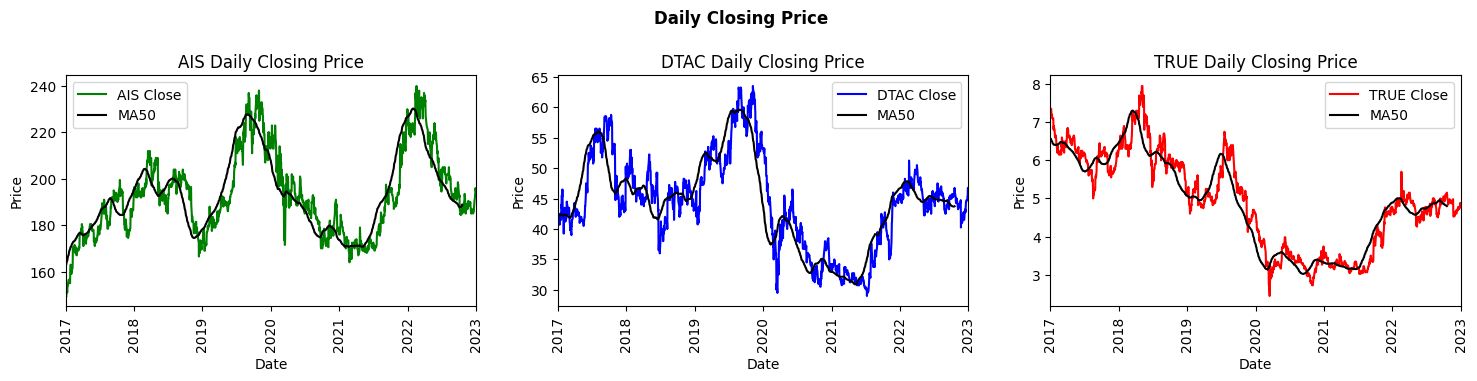

In [34]:
def daily_price_plot_arrange():
    plt.xticks(rotation=90)
    plt.xlim(datetime(2017,1,1) , datetime(2023,1,1))
    plt.legend()

    
plt.figure(figsize=(18,3))
plt.suptitle('Daily Closing Price', y=1.1, fontweight='bold')

plt.subplot(1,3,1)
sns.lineplot(x='Date', y='Price', data=ais, color='green', label='AIS Close')
sns.lineplot(x='Date', y=ais['Price'].rolling(50).mean(), data=ais, color='black', label='MA50')
daily_price_plot_arrange()
plt.title('AIS Daily Closing Price')

plt.subplot(1,3,2)
sns.lineplot(x='Date', y='Price', data=dtac, color='blue', label='DTAC Close')
sns.lineplot(x='Date', y=dtac['Price'].rolling(50).mean(), data=ais, color='black', label='MA50')
daily_price_plot_arrange()
plt.title('DTAC Daily Closing Price')

plt.subplot(1,3,3)
sns.lineplot(x='Date', y='Price', data=true, color='red', label='TRUE Close')
sns.lineplot(x='Date', y=true['Price'].rolling(50).mean(), data=ais, color='black', label='MA50')
daily_price_plot_arrange()
plt.title('TRUE Daily Closing Price')


The above graphs illustrate the closing stock prices of all three telecommunication companies in Thailand since 2017. The 50-day moving average has been applied to the prices to smooth out the fluctuations and make the trend lines more visible.

**Findings**

AIS has the highest average closing price at 192.79 THB per share, followed by DTAC and TRUE at 44.44 THB and 4.92 THB, respectively.
Starting in 2020, both TRUE and DTAC experienced a significant drop in their stock values, reaching their lowest values since 2018. Meanwhile, AIS saw a decline in stock price, almost reaching the levels it had in 2017. (possibly due to COVID19 pandemic)
This significant drop continued until mid-2021, at which point the stock prices of all three companies began to recover.

### Volatility

In [35]:
#Calculate Returns
for i,v in enumerate(stocklist):
    data = v[['Date','Price']].set_index('Date')
    data['returns'] = data['Price'].pct_change()
    exec(f"returns_{stockname[i]} = data")


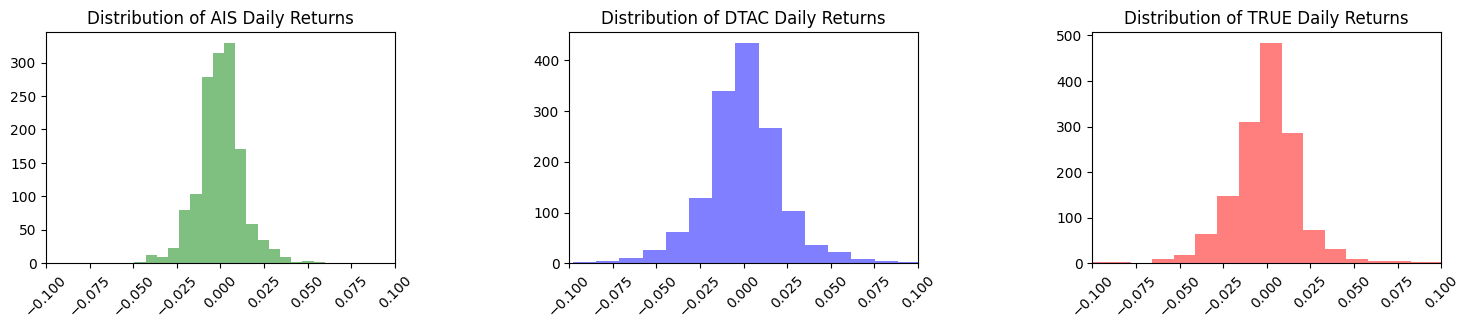

In [36]:
#Return Distributions
plt.figure(figsize=(18,3))

plt.subplot(1,3,1)
plt.hist(returns_ais['returns'] , bins = 20, alpha=0.5, color='green')
plt.title('Distribution of AIS Daily Returns')
plt.xlim(-0.10, 0.10)
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.hist(returns_dtac['returns'], bins = 20, alpha=0.5, color='blue')
plt.title('Distribution of DTAC Daily Returns')
plt.xlim(-0.10, 0.10)
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.hist(returns_true['returns'],bins = 20,  alpha=0.5, color='red')
plt.title('Distribution of TRUE Daily Returns')
plt.xlim(-0.10, 0.10)
plt.xticks(rotation=45)

plt.subplots_adjust(wspace=0.5)


In [57]:
ais_dvolatility = returns_ais['returns'].std() 
dtac_dvolatility = returns_dtac['returns'].std()
true_dvolatility = returns_true['returns'].std()
daily_volatility = [ais_dvolatility * 100,dtac_dvolatility * 100,true_dvolatility * 100]

ais_avolatiltiy = (ais_dvolatility * np.sqrt(252)) * 100
dtac_avolatiltiy = (dtac_dvolatility * np.sqrt(252)) * 100
true_avolatiltiy = (true_dvolatility * np.sqrt(252)) * 100
volatility_list = [ais_avolatiltiy,dtac_avolatiltiy,true_avolatiltiy]

annual_volatility_table = pd.DataFrame({'Company':['AIS','DTAC','TRUE'], 'Daily Standard Deviation %': daily_volatility, 'Annual Standard Deviation %':volatility_list})
annual_volatility_table.sort_values(by=['Annual Standard Deviation %'], ascending=False)


,Company,Daily Standard Deviation %,Annual Standard Deviation %
1,DTAC,2.356072,37.401485
2,TRUE,2.118118,33.624083
0,AIS,1.303208,20.687786


Volatility is a critical factor for investors, as it measures the rate at which the stock price changes over a given period. High volatility can lead to significant losses, but it can also create opportunities for investors who can manage the risks and take advantage of the price fluctuations.

To explore the volatility of the telecommunications companies in Thailand, we have calculated the daily returns by measuring the change in stock price from one day to the next, and then plotted a histogram to visualize the distribution of those returns. A broader distribution of returns suggests a more volatile stock. We have also calculated the standard deviation of the daily and annual returns, with a higher deviation indicating a more volatile stock price.

**Findings**

- AIS appears to be the least volatile, as evidenced by its histogram shape and lower standard deviation values (1.30% in daily SD and 20.68 in annual SD).
- On the other hand, DTAC exhibits the most volatility, with higher standard deviation values (2.35% in daily SD and 37.40% in annual SD).

### **Trade Volume**

Text(0.5, 1.0, 'TRUE Daily Closing Price')

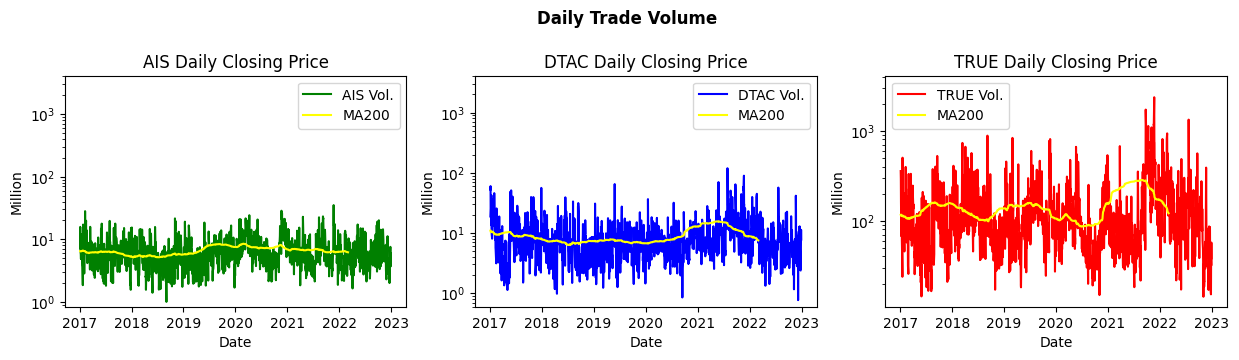

In [55]:
def daily_price_plot_arrange():
    plt.ylabel('Million')
    plt.yscale("log")
    plt.ylim([0,2**12])


plt.figure(figsize=(15,3))
plt.suptitle('Daily Trade Volume', y=1.1, fontweight='bold')

plt.subplot(1,3,1)
sns.lineplot(x='Date', y='Vol.', data=ais, color='green', label='AIS Vol.')
sns.lineplot(x='Date', y=ais['Vol.'].rolling(200).mean(), data=ais, color='yellow', label='MA200')
daily_price_plot_arrange()
plt.title('AIS Daily Closing Price')

plt.subplot(1,3,2)
sns.lineplot(x='Date', y='Vol.', data=dtac, color='blue', label='DTAC Vol.')
sns.lineplot(x='Date', y=dtac['Vol.'].rolling(200).mean(), data=ais, color='yellow', label='MA200')
daily_price_plot_arrange()
plt.title('DTAC Daily Closing Price')

plt.subplot(1,3,3)
sns.lineplot(x='Date', y='Vol.', data=true, color='red', label='TRUE Vol.')
sns.lineplot(x='Date', y=true['Vol.'].rolling(200).mean(), data=ais, color='yellow', label='MA200')
daily_price_plot_arrange()
plt.title('TRUE Daily Closing Price')


Trade volume refers to the total number of shares exchanged during a given period. High trade volume can indicate a significant number of transactions for a particular stock. The above graph shows the volume traded for all three telecommunication companies in Thailand over the last six years, represented on a logarithmic scale.

**Based on our analysis, the following findings can be highlighted:**

- Despite having the lowest price, TRUE is clearly the most traded, with AIS and DTAC following.
- In contrast, while AIS has the highest price, it has the lowest volume traded.
- When applying the 200-day moving average, we can observe that while AIS has been growing steadily, DTAC and TRUE experienced a sudden increase in trade volume around late 2021.

### Exploring Seasonal trend in Stock Price and Trading Volume

**Are there any repeating patterns for when the price would increase?**

To identify repeating patterns in the stock price, we can use technical analysis tools such as moving averages and chart patterns. Moving averages can help smooth out the price fluctuations and identify trends in the stock price. Chart patterns, on the other hand, can indicate potential price reversals or continuation of existing trends.

We can also use statistical analysis techniques such as time series analysis to identify patterns and trends in the stock price. This involves analyzing the data over time to identify patterns and relationships between variables.

It is important to note, however, that stock price movements are influenced by a wide range of factors such as economic indicators, company news and events, and global events. Therefore, it is not always possible to predict stock price movements based on historical patterns alone.

~~Using~~ the mathematical algorithm called "Seasonal Trend Decomposition" from Python's statsmodels library, we can observe patterns in stock price behavior. 

The seasonal trend decomposition breaks down the stock price time series into three components: trend, seasonality, and residual (or noise). 
- **Trend** represents the underlying direction of stock prices over time. 
- **Seasonality** refers to repeating patterns in the stock prices over time, such as more people using mobile services during holidays or special events. 
- **Residual** represents random fluctuations that are unrelated to the trend and seasonality, such as viral ad-hoc marketing events based on current trends at random periods of time. The results of the decomposition are shown on the graph below.

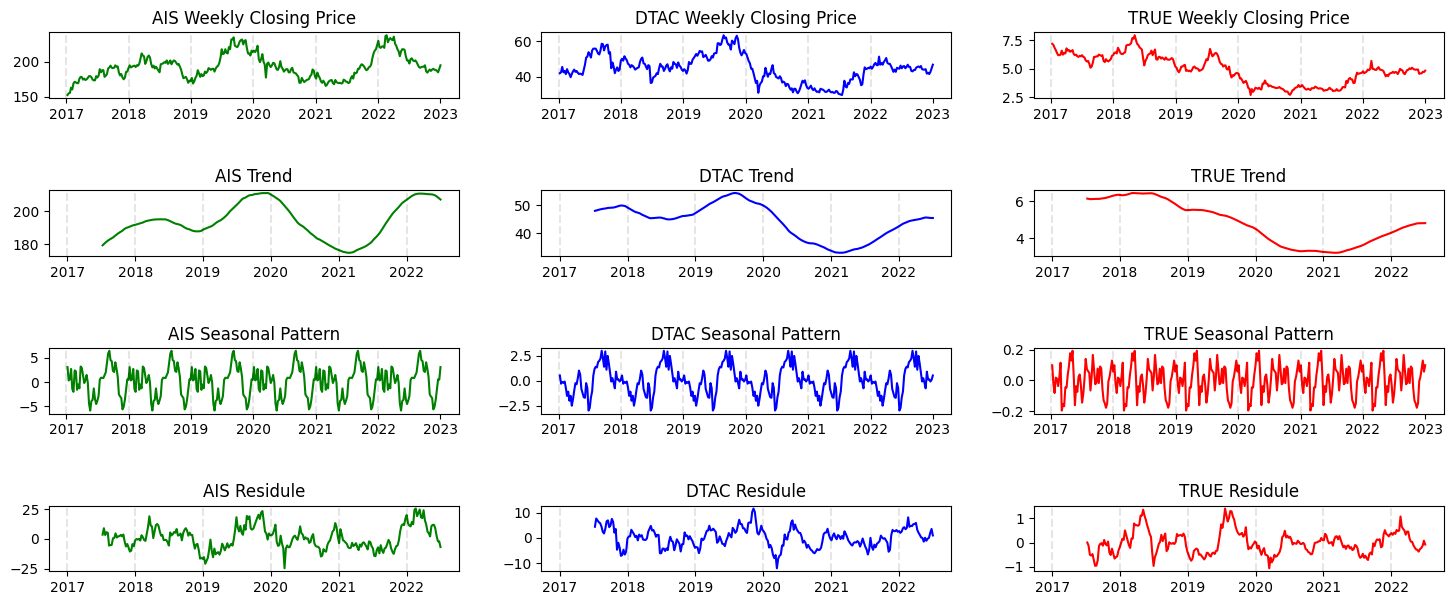

In [65]:
stl_price_ais = ais[['Date','Price']].set_index('Date').resample('W').last()
stl_price_dtac = dtac[['Date','Price']].set_index('Date').resample('W').last()
stl_price_true = true[['Date','Price']].set_index('Date').resample('W').last()



result_price_ais_add = sm.tsa.seasonal_decompose(stl_price_ais, model='additive')
result_price_dtac_add = sm.tsa.seasonal_decompose(stl_price_dtac, model='additive')
result_price_true_add = sm.tsa.seasonal_decompose(stl_price_true, model='additive')

def year_line():
    for year in range(2017,2023):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.1)

row = 4
col = 3
plt.figure(figsize=(18,7))

plt.subplot(row,col,1)
plt.plot(stl_price_ais, color='green')
plt.title('AIS Weekly Closing Price')
year_line()

plt.subplot(row,col,4)
plt.plot(result_price_ais_add.trend, color='green')
plt.title('AIS Trend')
year_line()

plt.subplot(row,col,7)
plt.plot(result_price_ais_add.seasonal, color='green')
plt.title('AIS Seasonal Pattern')
year_line()

plt.subplot(row,col,10)
plt.plot(result_price_ais_add.resid, color='green')
plt.title('AIS Residule')
year_line()


plt.subplot(row,col,2)
plt.plot(stl_price_dtac, color='blue')
plt.title('DTAC Weekly Closing Price')
year_line()

plt.subplot(row,col,5)
plt.plot(result_price_dtac_add.trend, color='blue')
plt.title('DTAC Trend')
year_line()

plt.subplot(row,col,8)
plt.plot(result_price_dtac_add.seasonal, color='blue')
plt.title('DTAC Seasonal Pattern')
year_line()

plt.subplot(row,col,11)
plt.plot(result_price_dtac_add.resid, color='blue')
plt.title('DTAC Residule')
year_line()


plt.subplot(row,col,3)
plt.plot(stl_price_true, color='red')
plt.title('TRUE Weekly Closing Price')
year_line()

plt.subplot(row,col,6)
plt.plot(result_price_true_add.trend, color='red')
plt.title('TRUE Trend')
year_line()

plt.subplot(row,col,9)
plt.plot(result_price_true_add.seasonal, color='red')
plt.title('TRUE Seasonal Pattern')
year_line()

plt.subplot(row,col,12)
plt.plot(result_price_true_add.resid, color='red')
plt.title('TRUE Residule')
year_line()


plt.subplots_adjust(hspace=1.4)



### **Seasonal Analysis**

**Let's look at AIS price seasonal analysis as an example**

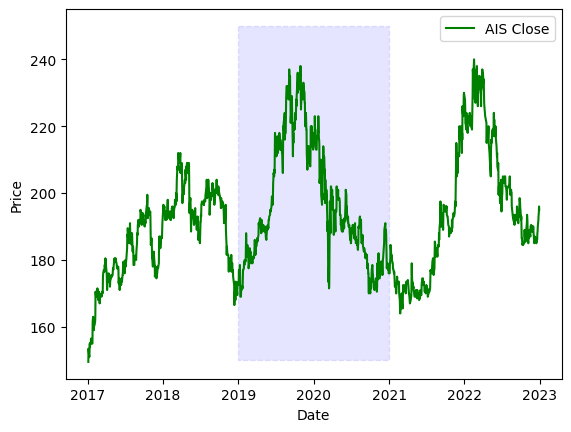

In [48]:
sns.lineplot(x='Date', y='Price', data=ais, color='green', label='AIS Close')
plt.fill_between(x=(datetime(2019,1,1),datetime(2021,1,1)),y1=150,y2=250, color='b', alpha=0.1, linestyle='--')

(array([18628., 18687., 18748., 18809., 18871., 18932., 18993.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18687.0, 0, '2021-03'),
  Text(18748.0, 0, '2021-05'),
  Text(18809.0, 0, '2021-07'),
  Text(18871.0, 0, '2021-09'),
  Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01')])

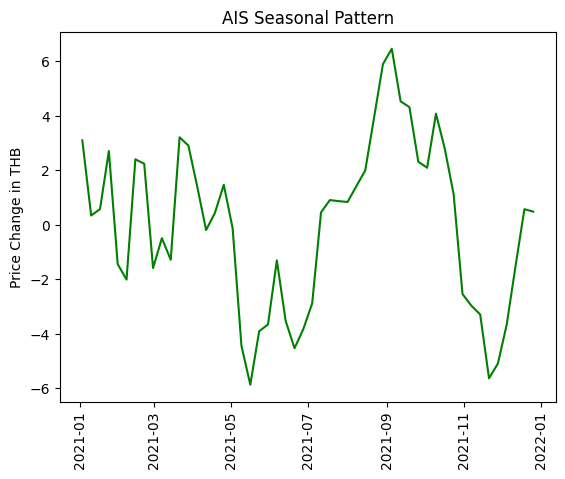

In [66]:
single_year_seasonal_price = result_price_ais_add.seasonal
single_year_seasonal_price = single_year_seasonal_price[(single_year_seasonal_price.index >= datetime(2021,1,1)) & (single_year_seasonal_price.index <= datetime(2021,12,31))]

single_year_seasonal_vol = result_vol_ais_add.seasonal
single_year_seasonal_vol =  single_year_seasonal_vol[(single_year_seasonal_vol.index >= datetime(2021,1,1)) & (single_year_seasonal_vol.index <= datetime(2021,12,31))]


plt.plot(single_year_seasonal_price, color='green')
#plt.plot(single_year_seasonal_vol, color='black')
plt.title('AIS Seasonal Pattern')
plt.ylabel('Price Change in THB')
plt.xticks(rotation=90)

**From AIS seasonality we can see that:**

- The maximum price occurs around September to November (+6 THB approx, +4 THB approx).
- The minimum price occurs around July and December (-6 THB approx).
- Therefore, based solely on this analysis, it could be suggested that the best time to buy AIS stock is between December and July, and the best time to sell would be between September and November.

### **Residual Analysis**

Earlier in the Trade volume analysis, we observed that both DTAC and TRUE experienced a sudden increase in trade volume around late 2021. To investigate this further, we applied the Seasonal Trend Decomposition technique once again on the trade volume data to confirm our initial observation. Our findings suggest that:

**Findings:**
- Trade volume cyclical trend on both TRUE and DTAC suddenly increase at relatively same period of time
- Both TRUE and DTAC company also has the same large spike in residule in mid-2021.

Based on our findings, it appears that a significant disruption occurred around mid-2021, leading to an unexpected spike in stock transactions in both the True and DTAC markets. This phenomenon can be considered an 'Extreme Anomaly', as it represents an unusual and unexpected pattern in the data that deviates significantly from normal behavior, beyond trend, seasonality, or even randomness in residual.

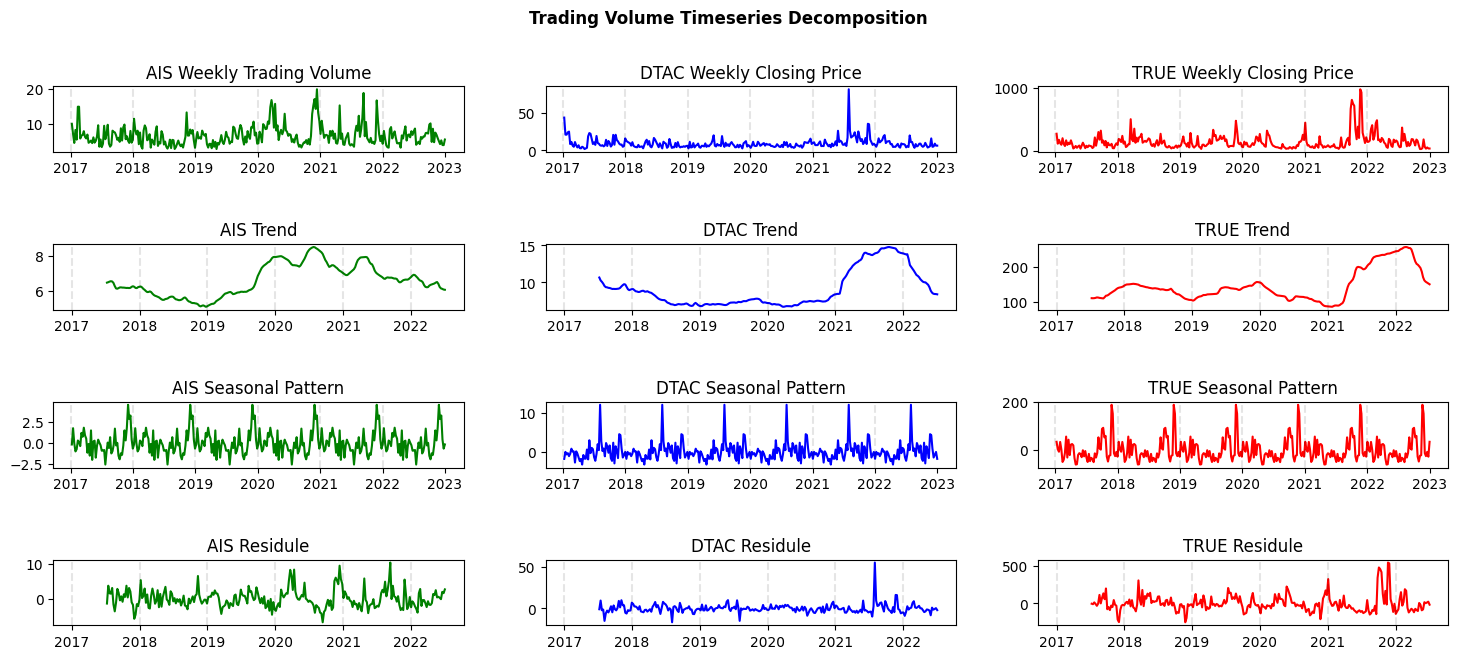

In [67]:
stl_vol_ais = ais[['Date','Vol.']].set_index('Date').resample('W').mean()
stl_vol_dtac = dtac[['Date','Vol.']].set_index('Date').resample('W').mean()
stl_vol_true = true[['Date','Vol.']].set_index('Date').resample('W').mean()

result_vol_ais_add = sm.tsa.seasonal_decompose(stl_vol_ais, model='additive')
result_vol_dtac_add = sm.tsa.seasonal_decompose(stl_vol_dtac, model='additive')
result_vol_true_add = sm.tsa.seasonal_decompose(stl_vol_true, model='additive')

def year_line():
    for year in range(2017,2023):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.1)

row = 4
col = 3
plt.figure(figsize=(18,7))
plt.suptitle('Trading Volume Timeseries Decomposition', y=0.99, fontweight='bold')

plt.subplot(row,col,1)
plt.plot(stl_vol_ais , color='green')
plt.title('AIS Weekly Trading Volume')
year_line()

plt.subplot(row,col,4)
plt.plot(result_vol_ais_add.trend, color='green')
plt.title('AIS Trend')
year_line()

plt.subplot(row,col,7)
plt.plot(result_vol_ais_add.seasonal, color='green')
plt.title('AIS Seasonal Pattern')
year_line()

plt.subplot(row,col,10)
plt.plot(result_vol_ais_add.resid, color='green')
plt.title('AIS Residule')
year_line()


plt.subplot(row,col,2)
plt.plot(stl_vol_dtac, color='blue')
plt.title('DTAC Weekly Closing Price')
year_line()

plt.subplot(row,col,5)
plt.plot(result_vol_dtac_add.trend, color='blue')
plt.title('DTAC Trend')
year_line()

plt.subplot(row,col,8)
plt.plot(result_vol_dtac_add.seasonal, color='blue')
plt.title('DTAC Seasonal Pattern')
year_line()

plt.subplot(row,col,11)
plt.plot(result_vol_dtac_add.resid, color='blue')
plt.title('DTAC Residule')
year_line()


plt.subplot(row,col,3)
plt.plot(stl_vol_true, color='red')
plt.title('TRUE Weekly Closing Price')
year_line()

plt.subplot(row,col,6)
plt.plot(result_vol_true_add.trend, color='red')
plt.title('TRUE Trend')
year_line()

plt.subplot(row,col,9)
plt.plot(result_vol_true_add.seasonal, color='red')
plt.title('TRUE Seasonal Pattern')
year_line()

plt.subplot(row,col,12)
plt.plot(result_vol_true_add.resid, color='red')
plt.title('TRUE Residule')
year_line()

plt.subplots_adjust(hspace=1.4)

In [68]:
from datetime import datetime
threshold = 3 # to isolate the extreme anomalies
x = [datetime(2017,1,31) , datetime(2022,12,31)]

ais_resid_mean = result_vol_ais_add.resid.mean()
ais_resid_std = result_vol_ais_add.resid.std()
ais_lower = ais_resid_mean - threshold * ais_resid_std
ais_upper = ais_resid_mean + threshold * ais_resid_std
    

true_resid_mean = result_vol_true_add.resid.mean()
true_resid_stf = result_vol_true_add.resid.std()
true_lower = true_resid_mean - threshold * true_resid_stf
true_upper = true_resid_mean + threshold * true_resid_stf


dtac_resid_mean = result_vol_dtac_add.resid.mean()
dtac_resid_stf = result_vol_dtac_add.resid.std()
dtac_lower = dtac_resid_mean - threshold * dtac_resid_stf
dtac_upper = dtac_resid_mean + threshold * dtac_resid_stf



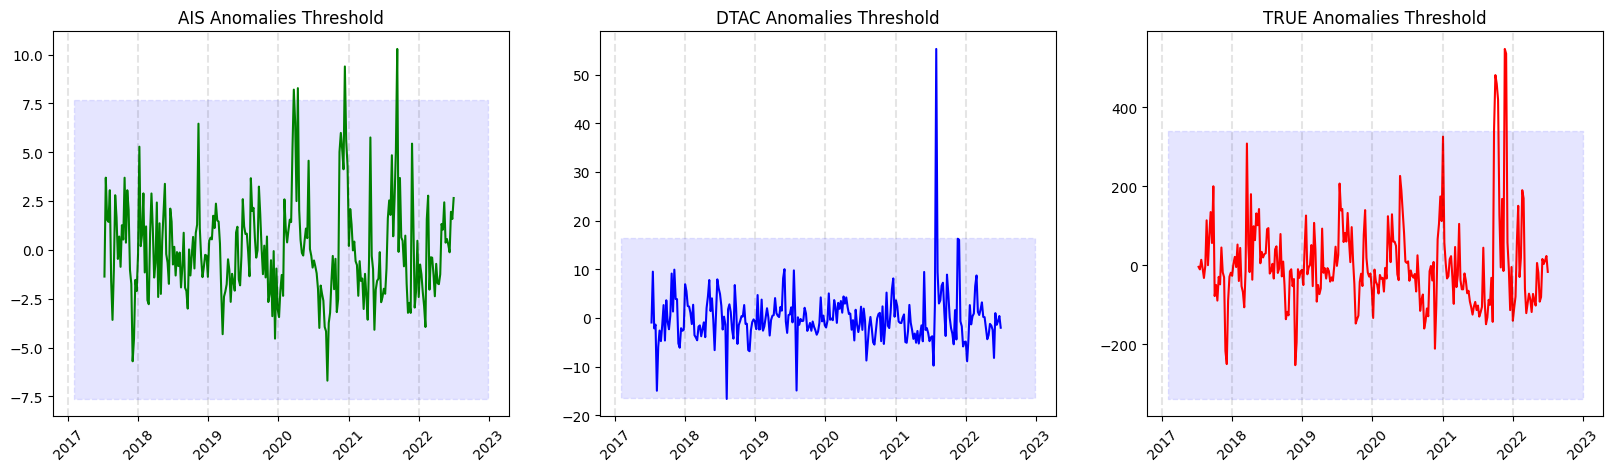

In [69]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(result_vol_ais_add.resid , color='green')
plt.fill_between(x,ais_lower,ais_upper, color='b', alpha=0.1, linestyle='--')
plt.title('AIS Anomalies Threshold')
plt.xticks(rotation=45)
year_line()

plt.subplot(1,3,2)
plt.plot(result_vol_dtac_add.resid, color='blue')
plt.fill_between(x,dtac_lower,dtac_upper, color='b', alpha=0.1, linestyle='--')
plt.title('DTAC Anomalies Threshold')
plt.xticks(rotation=45)
year_line()

plt.subplot(1,3,3)
plt.plot(result_vol_true_add.resid, color='red')
plt.fill_between(x,true_lower,true_upper, color='b', alpha=0.1, linestyle='--')
plt.title('TRUE Anomalies Threshold')
plt.xticks(rotation=45)
year_line()


Based on the graph, we know that the anomalies lies within around late 2021. To pinpoint an exact date range of anomalies. We would need a a resiuals part of the seasonal trend decomposition. We take the mean and standard deviation of the the resiuals. if there are any datapoint that are significantly far from designated bound (blue highlight) between the residual mean (i.e., 3x standard deviation "far"), it will be considered as an extreme anomalies. 

Findings:
- The mid-2021 spike exceeded our designated threshold. Therefore, the suspected disruption are in fact an extreme anomalies.
- AIS also display not one but 4 extreme anomalies but interestingly, the 4th extreme anomalies seems to be in the same period as other 2 companies
- We can make assumption that this **major disruption has an affects on whole Thailand telecommunication industry.**


**From a quick google search we have found that:**

Around September to November 2021, there was an extreme anomaly in the trade volume of DTAC and TRUE, which was caused by the announcement of a merger between DTAC and TRUE on 22 November 2021. 

As the merger is expected to move into its final phase in Q1 2023, we want to investigate the potential impact of the merger on the Thai telecommunication market, specifically in terms of price and trade volume for all players, and also the impact on AIS as the market becomes a duopoly

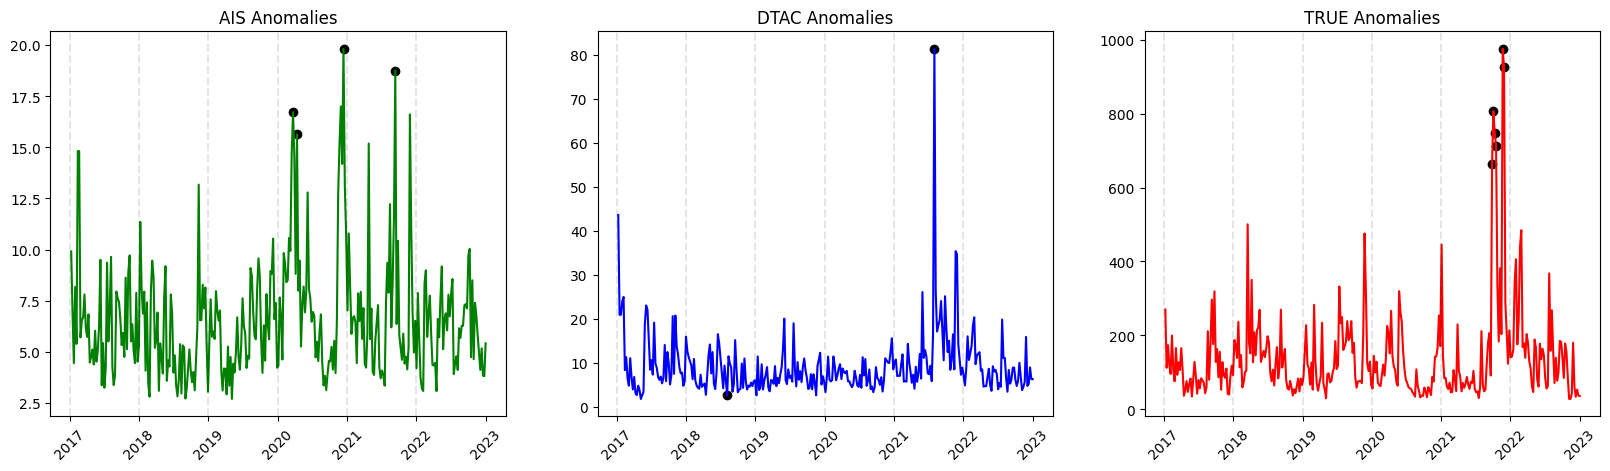

In [64]:
plt.figure(figsize=(20,5))

ais_anomalies = stl_vol_ais[(result_vol_ais_add.resid < ais_lower) | ( result_vol_ais_add.resid > ais_upper)]

plt.subplot(1,3,1)
plt.plot(stl_vol_ais, color='green')
plt.xticks(rotation=45)
plt.scatter(ais_anomalies.index,ais_anomalies ['Vol.'], color='black',marker='o')
plt.title('AIS Anomalies')
plt.subplots_adjust(hspace=1.5)
plt.xticks(rotation=45)
year_line()

#DTAC

dtac_anomalies = stl_vol_dtac[(result_vol_dtac_add.resid < dtac_lower) | ( result_vol_dtac_add.resid > dtac_upper)]

plt.subplot(1,3,2)
plt.plot(stl_vol_dtac, color='blue')
plt.xticks(rotation=45)
plt.scatter(dtac_anomalies.index,dtac_anomalies ['Vol.'], color='black',marker='o')
plt.title('DTAC Anomalies')
plt.subplots_adjust(hspace=1.5)
plt.xticks(rotation=45)
year_line()


#TRUE

true_anomalies = stl_vol_true[(result_vol_true_add.resid < true_lower) | ( result_vol_true_add.resid > true_upper)]

plt.subplot(1,3,3)
plt.plot(stl_vol_true, color='red')
plt.xticks(rotation=45)
plt.scatter(true_anomalies.index,true_anomalies ['Vol.'], color='black',marker='o')
plt.title('TRUE Anomalies')
plt.subplots_adjust(hspace=1.5)
plt.xticks(rotation=45)
year_line()


plt.subplots_adjust(hspace=1.4)

#print(true_anomalies)
#print(ais_anomalies)
#print(dtac_anomalies)

### Looking at aftermath of the merge announcement

Now that we have identified the extreme anomaly, we will be looking at what happened to price and trade volume after the announcement of the merger. 

First, we narrowed down the time series to the last 2 years to focus on the relevant period. We then timestamped the date of the merger announcement on November 22, 2021, to analyze the price behavior before and after the announcement. 

Finally, we examined the correlation between the three companies to determine if the merger announcement had any effect on price changes.

In [87]:
ais_2year = ais.query('Date >= "2020-11-22"')
dtac_2year = dtac.query('Date >= "2020-11-22"')
true_2year = true.query('Date >= "2020-11-22"')

At a glance of the graph, there is a price increase in all companies when the TRUE-DTAC merge was announced. 

A naive way to findout if AIS stock price has been affected. We will compare price correlation of 3 companies before and after the merge.

- Closing Price of 3 companies **between 22 November 2018 to 22 November 2019**, representing a time period where 3 companies aren't affect by COVID19 pandemic and were operating normally in the market.
- Closing Price of 3 companies **between 22 November 2021 to 22 November 2022,** represent period after the merge announcement until recent.

**To use this method, we would need assume that all companies stocks within the telecommunication industry are, to some extend, positively correlated because they operate in the same sector and are subject to similar market conditions and economic factors.** 

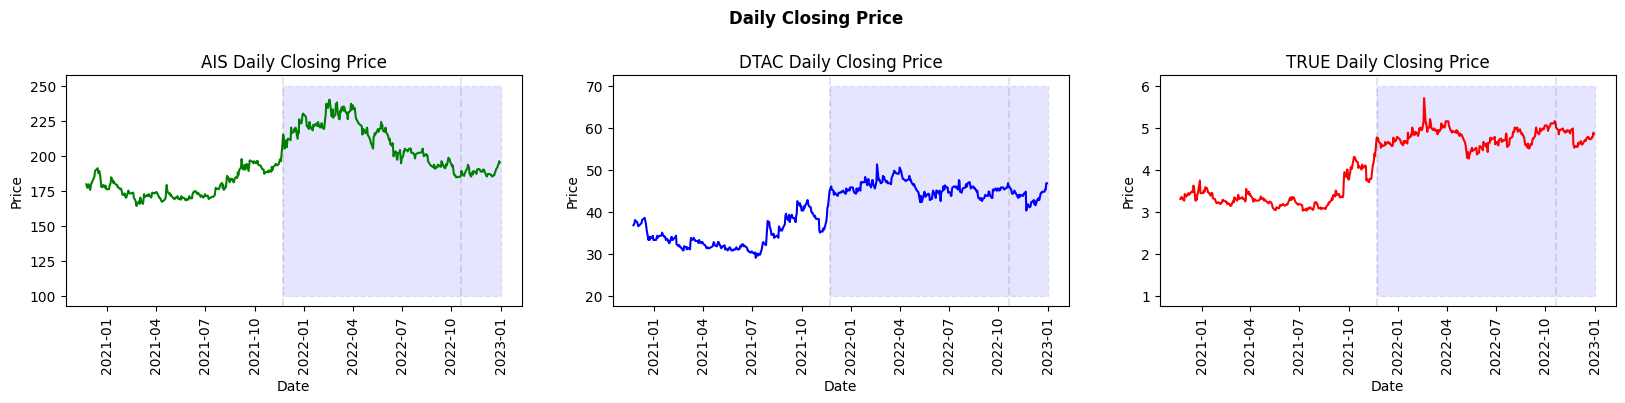

In [88]:
#Plotting the Price of each stocks
def daily_price_plot_arrange():
    plt.xticks(rotation=90)

plt.figure(figsize=(20,3))
plt.suptitle('Daily Closing Price', y=1.1, fontweight='bold')
plt.axvline(datetime(2021,11,22), color='k', linestyle='--', alpha=0.1) #first announcement
plt.axvline(datetime(2022,10,20), color='k', linestyle='--', alpha=0.1) #NTBC acknowledged the merger


plt.subplot(1,3,1)
sns.lineplot(x='Date', y='Price', data=ais_2year, color='green')
daily_price_plot_arrange()
plt.title('AIS Daily Closing Price')
plt.axvline(datetime(2021,11,22), color='k', linestyle='--', alpha=0.1) #first announcement
plt.axvline(datetime(2022,10,20), color='k', linestyle='--', alpha=0.1) #NTBC acknowledged the merger
plt.fill_between(x=(datetime(2021,11,22),datetime(2023,1,1)),y1=100,y2=250, color='b', alpha=0.1, linestyle='--')

plt.subplot(1,3,2)
sns.lineplot(x='Date', y='Price', data=dtac_2year, color='blue')
daily_price_plot_arrange()
plt.title('DTAC Daily Closing Price')
plt.axvline(datetime(2021,11,22), color='k', linestyle='--', alpha=0.1) #first announcement
plt.axvline(datetime(2022,10,20), color='k', linestyle='--', alpha=0.1) #NTBC acknowledged the merger
plt.fill_between(x=(datetime(2021,11,22),datetime(2023,1,1)),y1=20,y2=70, color='b', alpha=0.1, linestyle='--')

plt.subplot(1,3,3)
sns.lineplot(x='Date', y='Price', data=true_2year, color='red')
daily_price_plot_arrange()
plt.title('TRUE Daily Closing Price')
plt.axvline(datetime(2021,11,22), color='k', linestyle='--', alpha=0.1) #first announcement
plt.axvline(datetime(2022,10,20), color='k', linestyle='--', alpha=0.1) #NTBC acknowledged the merger
plt.fill_between(x=(datetime(2021,11,22),datetime(2023,1,1)),y1=1,y2=6, color='b', alpha=0.1, linestyle='--')
    


The correlation heatmap revealed that the price correlations between the telecommunication companies changed after the announcement of the TRUE-DTAC merger. 

**Findings**
- The price correlation between TRUE and DTAC decrease from 0.32 to 0.7, a strong positive correlation!
- The price correlation between AIS and TRUE decrease from 0.33 to 0.077, weaken the moderatly positive correlation significantly to no relationship at all!
- The price correlation between AIS and DTAC decrease from 0.91 to 0.59, weaken stong positive the correlation to a moderate level.

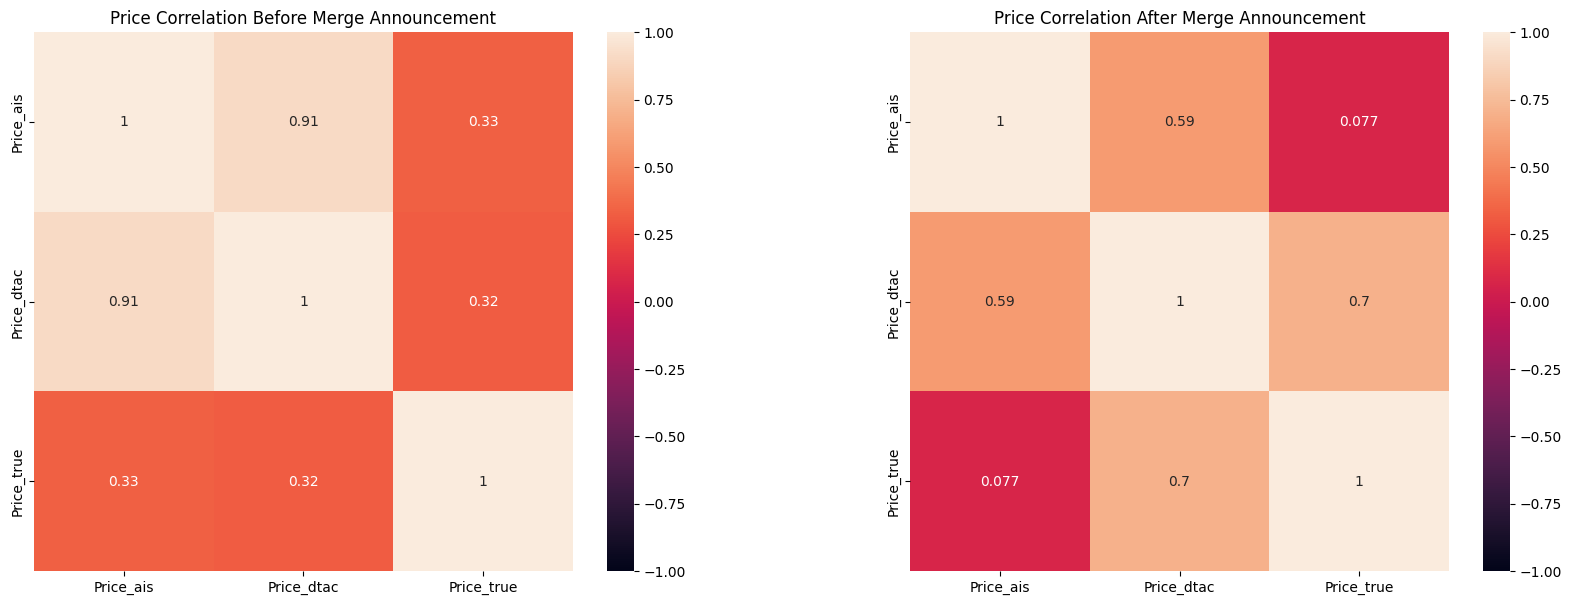

In [104]:
ais_merge = ais[['Date', 'Price', 'Vol.']].set_index('Date').query('(Date >= "2018-11-22") & (Date <= "2019-11-22")')
dtac_merge = dtac[['Date', 'Price', 'Vol.']].set_index('Date').query('(Date >= "2018-11-22") & (Date <= "2019-11-22")')
true_merge = true[['Date', 'Price', 'Vol.']].set_index('Date').query('(Date >= "2018-11-22") & (Date <= "2019-11-22")')

all_tele = ais_merge.merge(dtac_merge, left_index=True, right_index=True, suffixes=['_ais', '_dtac'])
all_tele = all_tele.merge(true_merge, left_index=True, right_index=True,suffixes=['', '_true'])
all_tele = all_tele.rename(columns={'Price': 'Price_true','Vol.': 'Vol._true'})

ais_merge_after = ais_2year[['Date', 'Price', 'Vol.']].set_index('Date').query('(Date >= "2021-11-22") & (Date <= "2022-11-22")')
dtac_merge_after = dtac_2year[['Date', 'Price', 'Vol.']].set_index('Date').query('(Date >= "2021-11-22") & (Date <= "2022-11-22")')
true_merge_after = true_2year[['Date', 'Price', 'Vol.']].set_index('Date').query('(Date >= "2021-11-22") & (Date <= "2022-11-22")')

all_tele_after = ais_merge_after.merge(dtac_merge_after, left_index=True, right_index=True, suffixes=['_ais', '_dtac'])
all_tele_after = all_tele_after.merge(true_merge_after, left_index=True, right_index=True,suffixes=['', '_true'])
all_tele_after = all_tele_after.rename(columns={'Price': 'Price_true','Vol.': 'Vol._true'})

plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
corr = all_tele.corr()
sns.heatmap(corr, annot=True,vmin=-1, vmax=1)
plt.title('Price Correlation Before Merge Announcement')

plt.subplot(1,2,2)
corr_after = all_tele_after.corr()
sns.heatmap(corr_after, annot=True,vmin=-1, vmax=1)
plt.title('Price Correlation After Merge Announcement')

plt.subplots_adjust(wspace=0.3)



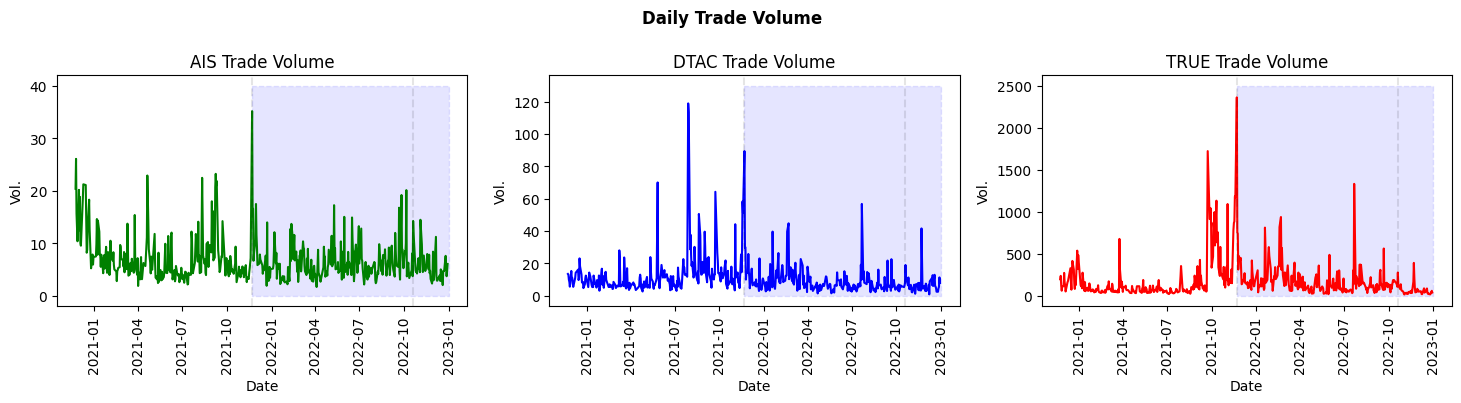

In [105]:
def daily_price_plot_arrange():
    plt.xticks(rotation=90)

plt.figure(figsize=(18,3))
plt.suptitle('Daily Trade Volume', y=1.1, fontweight='bold')
plt.axvline(datetime(2021,11,22), color='k', linestyle='--', alpha=0.1) #first announcement
plt.axvline(datetime(2022,10,20), color='k', linestyle='--', alpha=0.1) #NTBC acknowledged the merger


plt.subplot(1,3,1)
sns.lineplot(x='Date', y='Vol.', data=ais_2year, color='green')
daily_price_plot_arrange()
plt.title('AIS Trade Volume')
plt.axvline(datetime(2021,11,22), color='k', linestyle='--', alpha=0.1) #first announcement
plt.axvline(datetime(2022,10,20), color='k', linestyle='--', alpha=0.1) #NTBC acknowledged the merger
plt.fill_between(x=(datetime(2021,11,22),datetime(2023,1,1)),y1=0,y2=40, color='b', alpha=0.1, linestyle='--')


plt.subplot(1,3,2)
sns.lineplot(x='Date', y='Vol.', data=dtac_2year, color='blue')
daily_price_plot_arrange()
plt.title('DTAC Trade Volume')
plt.axvline(datetime(2021,11,22), color='k', linestyle='--', alpha=0.1) #first announcement
plt.axvline(datetime(2022,10,20), color='k', linestyle='--', alpha=0.1) #NTBC acknowledged the merger
plt.fill_between(x=(datetime(2021,11,22),datetime(2023,1,1)),y1=0,y2=130, color='b', alpha=0.1, linestyle='--')

plt.subplot(1,3,3)
sns.lineplot(x='Date', y='Vol.', data=true_2year, color='red')
daily_price_plot_arrange()
plt.title('TRUE Trade Volume')
plt.axvline(datetime(2021,11,22), color='k', linestyle='--', alpha=0.1) #first announcement
plt.axvline(datetime(2022,10,20), color='k', linestyle='--', alpha=0.1) #NTBC acknowledged the merger
plt.fill_between(x=(datetime(2021,11,22),datetime(2023,1,1)),y1=0,y2=2500, color='b', alpha=0.1, linestyle='--')

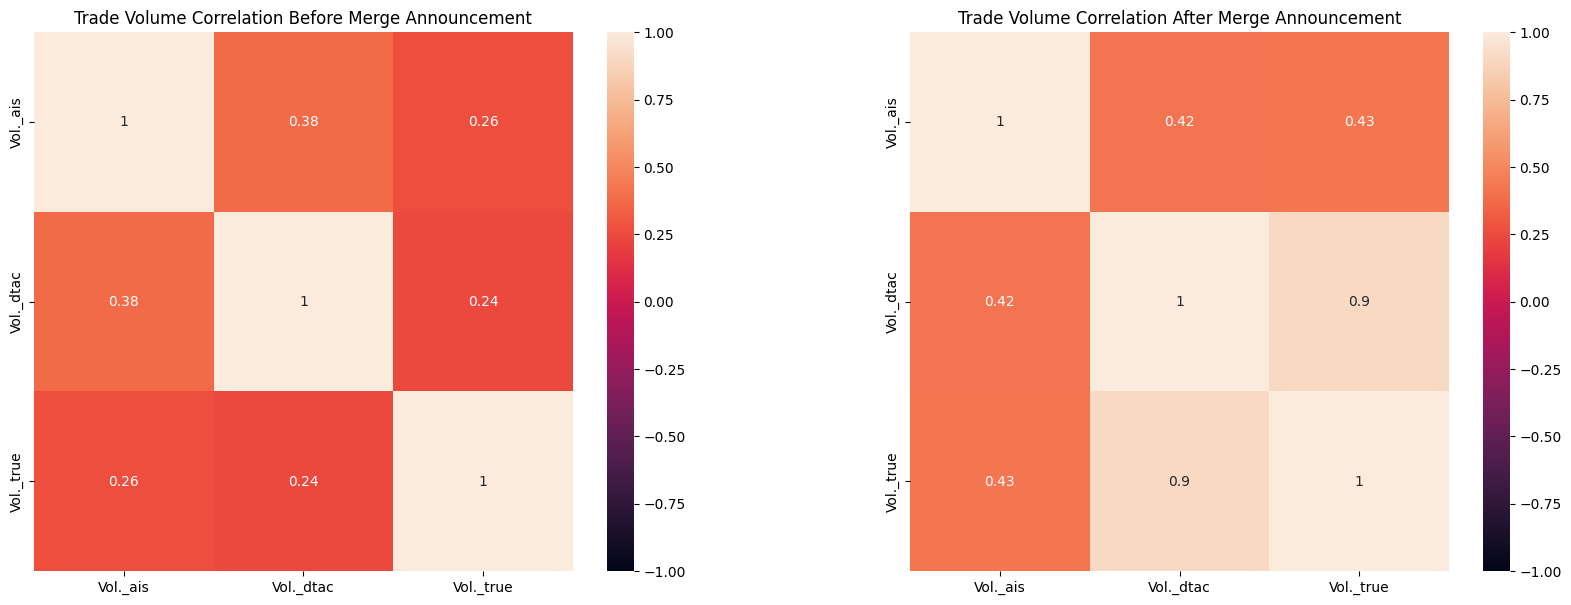

In [106]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
corr = all_tele[['Vol._ais', 'Vol._dtac', 'Vol._true']].astype('float').corr()
sns.heatmap(corr, annot=True,vmin=-1, vmax=1)
plt.title('Trade Volume Correlation Before Merge Announcement')

plt.subplot(1,2,2)
corr_after = all_tele_after[['Vol._ais', 'Vol._dtac', 'Vol._true']].astype('float').corr()
sns.heatmap(corr_after, annot=True,vmin=-1, vmax=1)
plt.title('Trade Volume Correlation After Merge Announcement')

plt.subplots_adjust(wspace=0.3)

Based on the correlation analysis and the observation of the stock price behavior, it appears that the announcement of the merger between TRUE and DTAC had a positive impact on their stock prices while AIS did not experience the same effect. 

It is difficult to definitively attribute the changes in stock prices and trade volume solely to the merger announcement, but it is possible that the merger news influenced the market sentiment and shifted investors' attention towards the merging companies, leading to the observed changes in stock prices and trade volume. 

Therefore, we can tentatively conclude that the merger between TRUE and DTAC would not have a negative impact on the stock price of AIS, but rather a shift in market sentiment towards the merging companies.

Through analyzing the stock data of three companies within the Thai telecommunication industry, we have identified an extreme anomaly that occurred around September to November 2021. After further investigation, we found that this anomaly was likely caused by the announcement of a merger between DTAC and TRUE, which would reduce the market into a duopoly between AIS and TRUE-DTAC. We then explored the stock price data of the three companies before and after the merger announcement, and found that there was a decrease in the price correlation between AIS and the merging companies, indicating that investor attention shifted away from AIS towards the merging companies. Based on this analysis, we can conclude that the merger between TRUE and DTAC would not negatively impact the stock price of AIS, but rather shift investor attention to market sentiment that favor the merging companies.